In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as scipystats
from scipy.stats import norm

In [46]:
MROZ = pd.read_csv('MROZ.csv')
MROZ.shape

(753, 22)

In [47]:
%matplotlib inline
plt.style.use('seaborn')


In [48]:
MROZ

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.556480,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.120260,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900040,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,0.754336,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


In [49]:
def stats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
stats(MROZ)

,mean,std,min,max,median,is null
inlf,0.568393,0.495630,0.000000,1.000000,1.000000,0
hours,740.576361,871.314216,0.000000,4950.000000,288.000000,0
kidslt6,0.237716,0.523959,0.000000,3.000000,0.000000,0
kidsge6,1.353254,1.319874,0.000000,8.000000,1.000000,0
age,42.537849,8.072574,30.000000,60.000000,43.000000,0
educ,12.286853,2.280246,5.000000,17.000000,12.000000,0
wage,4.177682,3.310282,0.128200,25.000000,3.481900,325
repwage,1.849734,2.419887,0.000000,9.980000,0.000000,0
hushrs,2267.270916,595.566649,175.000000,5010.000000,2164.000000,0
husage,45.120850,8.058793,30.000000,60.000000,46.000000,0


In [50]:
MROZ.groupby('inlf').mean()

,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
inlf,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.366154,1.356923,43.283077,11.796923,NaN,0.090154,2311.790769,45.793846,12.332308,...,21698.052308,0.692731,8.901538,8.572308,8.726154,0.646154,7.461538,21.698052,NaN,103.393846
1,1302.929907,0.140187,1.350467,41.971963,12.658879,4.177682,3.185864,2233.464953,44.609813,12.612150,...,24130.422897,0.668333,9.516355,8.988318,8.545561,0.640187,13.037383,18.937483,1.190173,234.719626


In [51]:
MROZ['inlf'].value_counts()

1    428
0    325
Name: inlf, dtype: int64

Distribution of 1 and 0: 


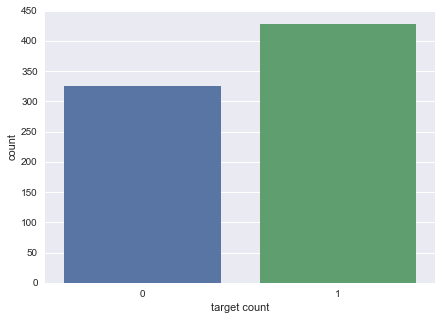

In [52]:

print('Distribution of 1 and 0: ')

plt.figure(figsize=(7,5))
sns.countplot(MROZ['inlf'])
plt.xlabel('target count')
plt.ylabel('count')
plt.show()

In [53]:
cpMROZ = MROZ.copy()
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
MROZ_Trans = sc_x.fit_transform(cpMROZ)
MROZ_Trans

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.8714045 ,  0.99849343,  1.45582156, ..., -0.79288286,
         0.02766057,  0.07200002],
       [ 0.8714045 ,  1.05132234, -0.45399314, ..., -0.0540965 ,
        -1.19285423, -0.61346678],
       [ 0.8714045 ,  1.42342157,  1.45582156, ..., -0.69570876,
         0.44848559,  0.18824877],
       ...,
       [-1.14757269, -0.8505182 , -0.45399314, ..., -0.87528196,
                nan, -0.64954398],
       [-1.14757269, -0.8505182 , -0.45399314, ...,  0.41756321,
                nan,  0.18824877],
       [-1.14757269, -0.8505182 , -0.45399314, ...,  0.70817816,
                nan, -0.13644602]])

In [54]:
MROZ = MROZ.drop(['wage','hours','faminc','lwage','expersq'],1)

In [55]:
MROZ

,inlf,kidslt6,kidsge6,age,educ,repwage,hushrs,husage,huseduc,huswage,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc
0,1,1,0,32,12,2.65,2708,34,12,4.0288,0.7215,12,7,5.0,0,14,10.910060
1,1,0,2,30,12,2.65,2310,30,9,8.4416,0.6615,7,7,11.0,1,5,19.499980
2,1,1,3,35,12,4.04,3072,40,12,3.5807,0.6915,12,7,5.0,0,15,12.039910
3,1,0,3,34,12,3.25,1920,53,10,3.5417,0.7815,7,7,5.0,0,6,6.799996
4,1,1,2,31,14,3.60,2000,32,12,10.0000,0.6215,12,14,9.5,1,7,20.100060
5,1,0,0,54,12,4.70,1040,57,11,6.7106,0.6915,14,7,7.5,1,33,9.859054
6,1,0,2,37,16,5.95,2670,37,12,3.4277,0.6915,14,7,5.0,0,11,9.152048
7,1,0,0,54,12,9.98,4120,53,8,2.5485,0.6915,3,3,5.0,0,35,10.900040
8,1,0,2,48,12,0.00,1995,52,4,4.2206,0.7515,7,7,3.0,0,24,17.305000
9,1,0,2,39,12,4.15,2100,43,12,5.7143,0.6915,7,7,5.0,0,21,12.925000


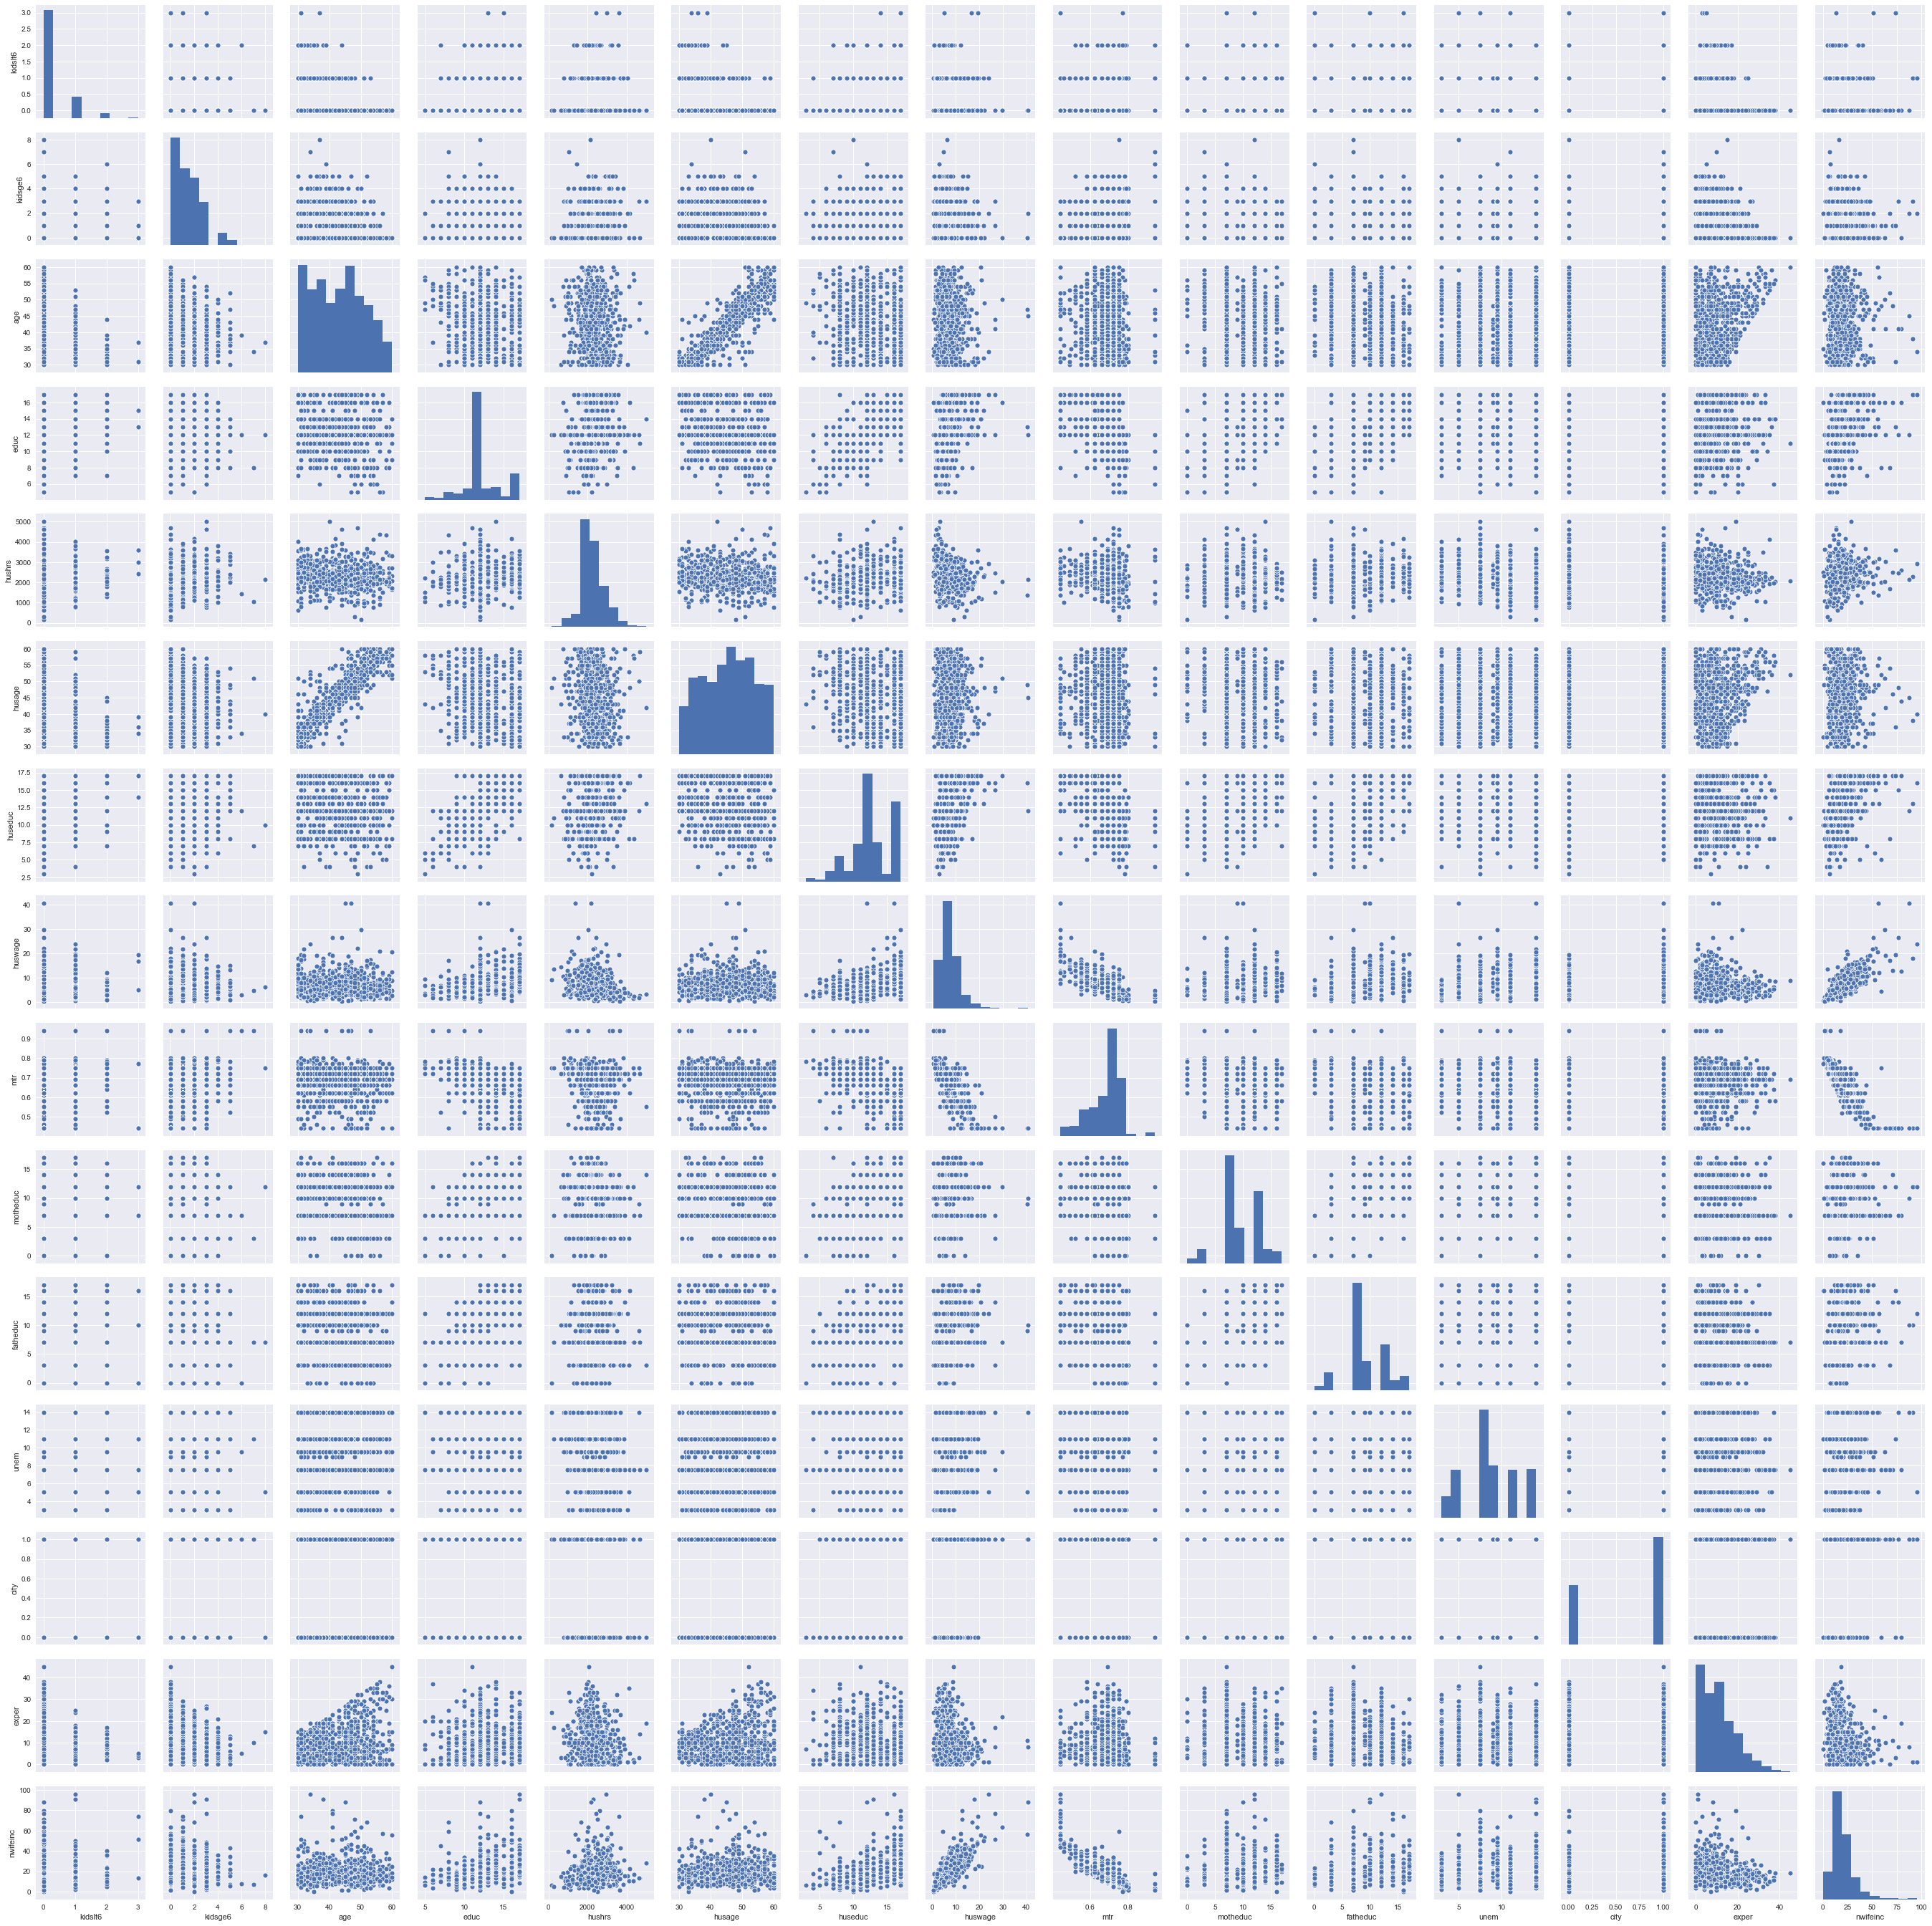

In [56]:
sns.pairplot(MROZ[['kidslt6', 'kidsge6', 'age', 'educ', 'hushrs', 'husage','huseduc','huswage','mtr','motheduc','fatheduc','unem','city','exper','nwifeinc']].dropna(how = 'any', axis = 0))

In [57]:
class lm0:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        (self.n,self.r) = x.shape
        xx = np.dot(x.T,x)
        xy = np.dot(x.T,y)
        self.xxi = np.linalg.inv(xx)
        self.b = np.linalg.solve(xx,xy)
        e = y - np.dot(x,self.b)
        self.resid = e
        self.vb = self.genvariance(e)
        self.se = np.sqrt(np.diagonal(self.vb))
        self.tstat = np.divide(self.b,self.se)
        self.pval = 2*norm.cdf(-np.abs(self.tstat))
        self.rsq = 1-e.var()/y.var()
        self.adjrsq = 1-(1-self.rsq)*(self.n-1)/(self.n-self.r)
        self.logl = -self.n/2*(np.log(2*np.pi*e.var())+1)
        self.aic = 2*self.r-2*self.logl
        self.bic = np.log(self.n)*self.r-2*self.logl
        nulllike = -self.n/2*(np.log(2*np.pi*y.var())+1)
        self.deviance = 2*(self.logl-nulllike)
    def genvariance(self,e):
        return e.var()*self.xxi
    def predict(self,*args):
        if len(args)>=2:
            raise Exception('Predict takes 0 or 1 argument')
        elif len(args)==0:
            newx = self.x
        else:
            newx = args[0]
        return np.dot(newx,self.b)
    def tidy(self):
        df = [self.b,self.se,self.tstat,self.pval]
        df = [x.reshape(-1,1) for x in df]
        df = np.hstack(df)
        df = pd.DataFrame(df,columns=['est','std.err','t.stat','p.val'])
        return df
    def glance(self):
        df = pd.DataFrame(columns=['r.squared','adj.rsq','r','logl',\
                                   'aic','bic','deviance','df'])
        df.loc[0] = [self.rsq,self.adjrsq,self.r,self.logl,self.aic,\
                     self.bic,self.deviance,self.n-self.r]
        return df
    def mspe(self,xtest,ytest):
        err = ytest - self.predict(xtest)
        return np.array(err.var())

class lm(lm0):
    def __init__(self,x,y):
        (self.n,self.r) = x.shape
        ones = np.ones((self.n,1))
        x = np.hstack((ones,x))
        super(lm,self).__init__(x,y)
    def predict(self,*args):
        if len(args)==1:
            newx = args[0]
            m = newx.shape[0]
            ones = np.ones((m,1))
            newx = np.hstack((ones,newx))
            return super(lm,self).predict(newx)
        return super(lm,self).predict(*args)

class white(lm):
    def genvariance(self,e):
        meat = np.diagflat(e**2)
        meat = self.x.T.dot(meat).dot(self.x)
        return self.xxi.dot(meat).dot(self.xxi)

In [58]:
MROZ

,inlf,kidslt6,kidsge6,age,educ,repwage,hushrs,husage,huseduc,huswage,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc
0,1,1,0,32,12,2.65,2708,34,12,4.0288,0.7215,12,7,5.0,0,14,10.910060
1,1,0,2,30,12,2.65,2310,30,9,8.4416,0.6615,7,7,11.0,1,5,19.499980
2,1,1,3,35,12,4.04,3072,40,12,3.5807,0.6915,12,7,5.0,0,15,12.039910
3,1,0,3,34,12,3.25,1920,53,10,3.5417,0.7815,7,7,5.0,0,6,6.799996
4,1,1,2,31,14,3.60,2000,32,12,10.0000,0.6215,12,14,9.5,1,7,20.100060
5,1,0,0,54,12,4.70,1040,57,11,6.7106,0.6915,14,7,7.5,1,33,9.859054
6,1,0,2,37,16,5.95,2670,37,12,3.4277,0.6915,14,7,5.0,0,11,9.152048
7,1,0,0,54,12,9.98,4120,53,8,2.5485,0.6915,3,3,5.0,0,35,10.900040
8,1,0,2,48,12,0.00,1995,52,4,4.2206,0.7515,7,7,3.0,0,24,17.305000
9,1,0,2,39,12,4.15,2100,43,12,5.7143,0.6915,7,7,5.0,0,21,12.925000


In [64]:
x = MROZ.iloc[:,1:]
y = MROZ.iloc[:,0]
x

,kidslt6,kidsge6,age,educ,repwage,hushrs,husage,huseduc,huswage,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc
0,1,0,32,12,2.65,2708,34,12,4.0288,0.7215,12,7,5.0,0,14,10.910060
1,0,2,30,12,2.65,2310,30,9,8.4416,0.6615,7,7,11.0,1,5,19.499980
2,1,3,35,12,4.04,3072,40,12,3.5807,0.6915,12,7,5.0,0,15,12.039910
3,0,3,34,12,3.25,1920,53,10,3.5417,0.7815,7,7,5.0,0,6,6.799996
4,1,2,31,14,3.60,2000,32,12,10.0000,0.6215,12,14,9.5,1,7,20.100060
5,0,0,54,12,4.70,1040,57,11,6.7106,0.6915,14,7,7.5,1,33,9.859054
6,0,2,37,16,5.95,2670,37,12,3.4277,0.6915,14,7,5.0,0,11,9.152048
7,0,0,54,12,9.98,4120,53,8,2.5485,0.6915,3,3,5.0,0,35,10.900040
8,0,2,48,12,0.00,1995,52,4,4.2206,0.7515,7,7,3.0,0,24,17.305000
9,0,2,39,12,4.15,2100,43,12,5.7143,0.6915,7,7,5.0,0,21,12.925000


In [60]:
modela = lm(x,y)

modela(tidy)

In [62]:
modela.tidy()

,est,std.err,t.stat,p.val
0,2.089672,0.346588,6.029261,1.647115e-09
1,-0.161717,0.029054,-5.566028,2.606115e-08
2,0.030755,0.011565,2.659336,7.829484e-03
3,-0.007710,0.003730,-2.067122,3.872262e-02
4,0.011266,0.008091,1.392341,1.638193e-01
5,0.095892,0.006719,14.271765,3.281661e-46
6,-0.000079,0.000028,-2.801905,5.080180e-03
7,-0.001794,0.003594,-0.499163,6.176643e-01
8,-0.004384,0.005946,-0.737183,4.610108e-01
9,-0.018598,0.006309,-2.947742,3.201038e-03


In [68]:
modelb = smf.ols('inlf~nwifeinc',data=MROZ).fit()
print(modelbsm.qqplot(model2.resid)
plt.show()
scipystats.probplot(model2.resid, dist="norm", plot=pylab)
pylab.show().summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 07 Mar 2019   Prob (F-statistic):            0.00123
Time:                        19:49:46   Log-Likelihood:                -534.17
No. Observations:                 753   AIC:                             1072.
Df Residuals:                     751   BIC:                             1082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6692      0.036     18.650      0.0

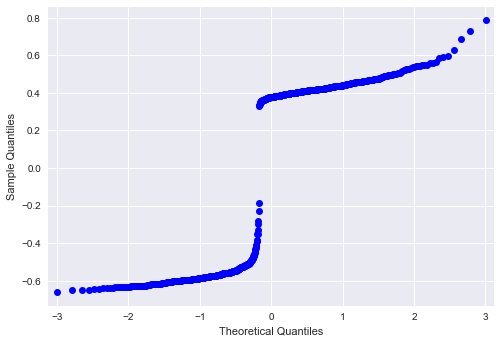

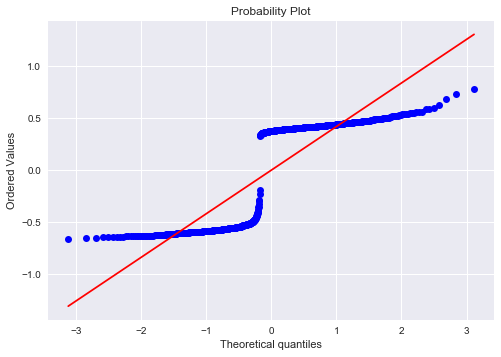

In [69]:
sm.qqplot(modelb.resid)
plt.show()
scipystats.probplot(modelb.resid, dist="norm", plot=pylab)
pylab.show()

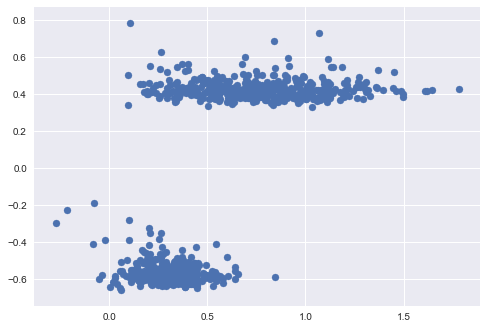

In [70]:
plt.scatter(modela.predict(), modelb.resid)